
#  Using .melt() to reshape government data

##  Assignment 

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to view the table in the IPython shell before beginning the exercise.

##  Pre exercise code 

```
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

fn_ur = 'https://assets.datacamp.com/production/repositories/5486/datasets/d40033480dddc4b57538c90a6e90c2702c93444c/SeriesReport-20200411055936_fded68.p'

ur_wide = load(urllib.request.urlopen(fn_ur))
```



##  Instructions 

- Use `.melt()` to unpivot all of the columns of `ur_wide` except `year` and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.
- Add a column to `ur_tall` named `date` which combines the `year` and `month` columns as **year**-**month** format into a larger string, and converts it to a date data type. 
- Sort `ur_tall` by date and save as `ur_sorted`.
- Using `ur_sorted`, plot `unempl_rate` on the y-axis and `date` on the x-axis.

In [97]:
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

ur_wide = pd.read_pickle("SeriesReport-20200411055936_fded68.p")

In [98]:
ur_wide

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


In [100]:
ur_tall = ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')

In [101]:
ur_tall.head()

,year,month,unempl_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6


In [118]:
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year']).dt.to_period('M')

C:\Users\ROYAL\AppData\Local\Temp\ipykernel_16996\2773028667.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year']).dt.to_period('M')


In [119]:
ur_tall

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01
1,2011,jan,9.1,2011-01
2,2012,jan,8.3,2012-01
3,2013,jan,8.0,2013-01
4,2014,jan,6.6,2014-01
...,...,...,...,...
127,2016,dec,4.7,2016-12
128,2017,dec,4.1,2017-12
129,2018,dec,3.9,2018-12
130,2019,dec,3.5,2019-12


In [120]:
ur_sorted = ur_tall.sort_values('date')

<Axes: xlabel='date'>

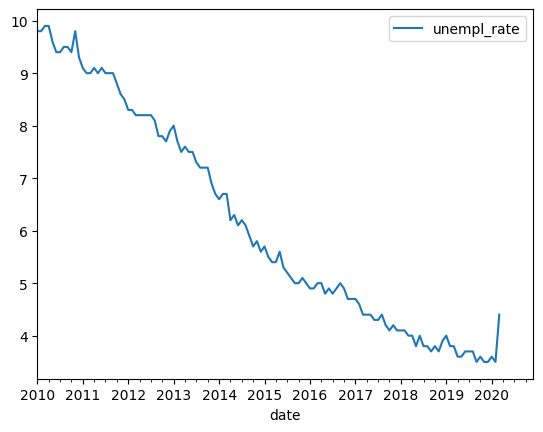

In [121]:
ur_sorted.plot(x='date', y='unempl_rate')